# Collaborative Filtering (SVD)

In [ ]:
!pip install scikit-surprise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise.model_selection import cross_validate, train_test_split
from surprise.accuracy import rmse, mae

In [ ]:
ratings = pd.read_csv('jester_ratings.csv')

In [ ]:
ratings.shape

(1761439, 3)

In [ ]:
ratings.head()

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [ ]:
ratings.describe()

,userId,jokeId,rating
count,1.761439e+06,1.761439e+06,1.761439e+06
mean,3.272322e+04,7.071133e+01,1.618602e+00
std,1.828011e+04,4.600790e+01,5.302608e+00
min,1.000000e+00,5.000000e+00,-1.000000e+01
25%,1.720200e+04,2.100000e+01,-2.031000e+00
50%,3.480800e+04,6.900000e+01,2.219000e+00
75%,4.730600e+04,1.120000e+02,5.719000e+00
max,6.397800e+04,1.500000e+02,1.000000e+01


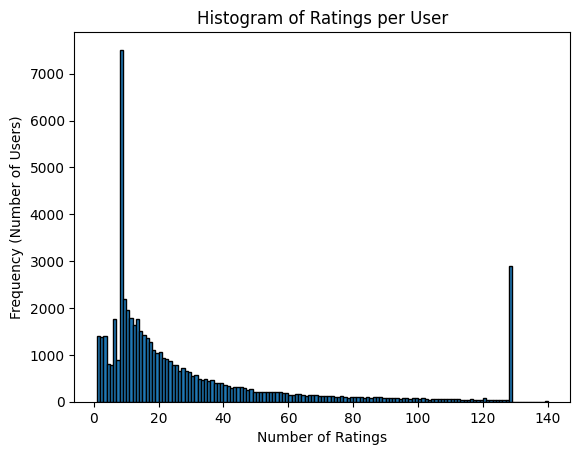

In [ ]:
# Count how many ratings each user has given
ratings_per_user = ratings['userId'].value_counts()

# Plot a histogram of the number of ratings per user
plt.hist(ratings_per_user, bins=range(1, ratings_per_user.max() + 1), edgecolor='black')
plt.title('Histogram of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency (Number of Users)')
plt.show()

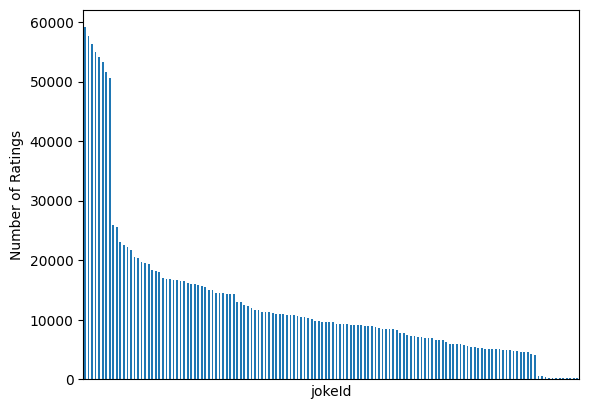

In [ ]:
# Number of Ratings Distributions
ratings['jokeId'].value_counts().plot(kind='bar')
plt.ylabel("Number of Ratings")
plt.xticks([])
plt.show()


## Data Prep

This simplified data source is cleaned

## Model Selection

In [ ]:
# Creating a Reader Object for Ratings and a Dataset Object
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(ratings[['userId', 'jokeId', 'rating']], reader)

In [ ]:
# Creating a baseline model
trainsSet = data.build_full_trainset()
algo = NormalPredictor()
cross_validate(algo, data, ['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    7.2833  7.2538  7.2803  7.2602  7.2667  7.2689  0.0114  
MAE (testset)     5.8912  5.8629  5.8880  5.8697  5.8742  5.8772  0.0108  
Fit time          1.95    2.62    3.20    2.99    2.66    2.68    0.43    
Test time         2.81    3.32    3.41    3.90    2.51    3.19    0.48    


{'test_rmse': array([7.28326507, 7.25384838, 7.28034636, 7.26016396, 7.26672181]),
 'test_mae': array([5.89122963, 5.86287549, 5.88803515, 5.86969886, 5.87421507]),
 'fit_time': (1.9456186294555664,
  2.6237096786499023,
  3.1965150833129883,
  2.9894516468048096,
  2.6556613445281982),
 'test_time': (2.812527656555176,
  3.3222405910491943,
  3.4147403240203857,
  3.896622657775879,
  2.5143792629241943)}

In [ ]:
#Creating an SVD model
algo = SVD()
cross_validate(algo, data, ['RMSE', 'MAE'], cv=5, verbose=True)


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)



c:\Users\omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\completerlib.py:146: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache
c:\Users\omar\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\completerlib.py:146: UserWarning: using rootmodules_cache requires you to install the `pickleshare` library.
  ip.db['rootmodules_cache'] = rootmodules_cache


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4.4987  4.4959  4.5048  4.4972  4.4966  4.4986  0.0032  
MAE (testset)     3.3725  3.3685  3.3750  3.3676  3.3707  3.3709  0.0027  
Fit time          21.28   20.58   21.63   22.23   20.55   21.25   0.64    
Test time         3.68    3.81    3.87    3.93    4.56    3.97    0.31    


{'test_rmse': array([4.49867091, 4.49591745, 4.50482993, 4.49719681, 4.49658899]),
 'test_mae': array([3.37252561, 3.36852733, 3.37499364, 3.36759607, 3.37068875]),
 'fit_time': (21.280800580978394,
  20.583564281463623,
  21.630720853805542,
  22.229564428329468,
  20.547703981399536),
 'test_time': (3.67997145652771,
  3.8111233711242676,
  3.8739702701568604,
  3.929417133331299,
  4.561872482299805)}

## Hypertuning


In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [100, 200, 500],
              'n_epochs': [5, 10],
              'lr_all':[0.005, 0.05, 0.1],
              'reg_all':[0.02,0.1]
              }
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data)

In [ ]:
import pickle


# save the model to disk
pickle.dump(grid_search, open('surprise_grid_search_svd_max500.sav', 'wb'))
#Load the model from disk
grid_search = pickle.load(open('surprise_grid_search_svd_max500.sav', 'rb'))



In [ ]:
grid_search.best_score

In [ ]:
grid_search.best_params

In [ ]:
#One more Time
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [1000, 1500],
              'n_epochs': [10, 15],
              'lr_all':[0.005, 0.1],
              'reg_all':[0.02,0.05]
              }
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
grid_search.fit(data)

In [ ]:
# save the model to disk
pickle.dump(grid_search, open('surprise_grid_search_svd_max1000.sav', 'wb'))
#Load the model from disk
grid_search = pickle.load(open('surprise_grid_search_svd_max1000.sav', 'rb'))

In [ ]:
grid_search.best_params

In [ ]:
grid_search.best_score

## Training the model

Initializing SVD with best params

In [ ]:
params = {'n_factors': 1500, 'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.02}

algo = SVD(n_factors=params['n_factors'],
           n_epochs=params['n_epochs'],
           lr_all=params['lr_all'],
           reg_all=params['reg_all'])

In [ ]:
train, test = train_test_split(data, 0.2, random_state=11)

In [ ]:
algo.fit(train)

In [ ]:
predictions = algo.test(test)

In [ ]:
rmse(predictions)

RMSE: 4.0901


4.090090842165906

## Recommend Top 3

In [ ]:
params = {'n_factors': 1500, 'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.02}

algo = SVD(n_factors=params['n_factors'],
           n_epochs=params['n_epochs'],
           lr_all=params['lr_all'],
           reg_all=params['reg_all'])

In [ ]:
algo.fit(data.build_full_trainset())

In [ ]:
def recommend_top_k(data, algo, user_id, top_k=3):
  '''
    Recommends the top-k unrated items for a given user based on predicted ratings.
    Note: user ids and item ids are mapped to inner ids. You can go back and forth between ids using built-in functions
  '''
  #Build TrainSet object
  trainSet = data.build_full_trainset()

  #Get all items
  all_items = set(trainSet.all_items()) # Inner ID

  #Get Items rated by user
  user_items_full = set(trainSet.ur[trainSet.to_inner_uid(user_id)])
  user_items = set([x[0] for x in user_items_full])

  #create set with unrated items
  unrated_items = all_items - user_items

  #predict all unrated items and sort them
  predictions = [algo.predict(user_id, trainSet.to_raw_iid(item_id)) for item_id in unrated_items]
  predictions = sorted(predictions, key=lambda x: x.est, reverse=True)

  for i in range(top_k):
      print(f"Item ID: {predictions[i].iid}, Predicted Rating: {predictions[i].est:.2f}")

In [ ]:
recommend_top_k(data, algo, 44)

Item ID: 83, Predicted Rating: 4.23
Item ID: 148, Predicted Rating: 4.14
Item ID: 114, Predicted Rating: 4.13


## Compute Entire predicytion Matrix

In [ ]:
ratings = pd.read_csv('jester_ratings.csv')

#define the ratings range
reader = Reader(rating_scale=(-10, 10))
#create a Dataset object
data = Dataset.load_from_df(ratings[['userId', 'jokeId', 'rating']], reader)

#load the model
algo = pickle.load(open('algo_01.pkl', 'rb'))

#Creating a trainset object; to get all users and items
trainSet = data.build_full_trainset()

#list to add all ratings (actual and predicted)
all_predictions = []

#Get all users and items
users = list(trainSet.all_users())
items = list(trainSet.all_items())

#Get the raw ids for users and items (in the trainset, they are mapped to inner ids)
for user in users:
  raw_user_id = trainSet.to_raw_uid(user)
  for item in items:
    raw_item_id = trainSet.to_raw_iid(item)

    #check if item already rated
    #format of trainSet.ur[user] is [(item_id, rating), (item_id, rating), ...]

    #create a list of user rated items
    user_rated_items = {x[0] for x in trainSet.ur[user]}

    #check if current item was rated by users. If yes, use the actual. otherwise, predict.
    if item in user_rated_items:
      #next gets the first result from the generator
      rating = next((x[1] for x in trainSet.ur[user] if x[0] == item), None)
    else:
      #estimation from prediction using raw ids
      rating = algo.predict(raw_user_id, raw_item_id).est

    all_predictions.append({
      'user_id': raw_user_id,
      'item_id': raw_item_id,
      'rating': rating,
    })

predictions_df = pd.DataFrame(all_predictions)
predictions_df.to_csv("predictions.csv", index=False)
#convert into a user item matrix
rating_matrix = predictions_df.pivot(index='user_id', columns='item_id', values='rating')
#save as csv
rating_matrix.to_csv("rating_matrix_index.csv", index = True)



